# Lecture 5 Finding Zeros in Multiple dimentions

    1. White board stuff
    2. Using fmin in scipy
    3. Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 3'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 3
 b_wire.py                efld.py            secret_plot_function.py
'Chapter 3 Stuff.ipynb'   __pycache__/
 efld_mag2.py             requirements.txt


In [3]:
%run efld.py 
%run efld_mag2.py

In [4]:
x_zero = scipy.optimize.fmin(efld_mag2, [0.25,0.25])
print(x_zero)

Optimization terminated successfully.
         Current function value: 0.000026
         Iterations: 105
         Function evaluations: 202
[ 0.26391312 -0.19112457]


In [5]:
efld(x_zero)

array([0.00506891, 0.00061466])

Looks like it's not that close to zero, but lets check other values close to it,

In [6]:
efld(x_zero + [0.000001, 0.0]), efld(x_zero + [0.0, 0.000001])

(array([-417310.71091846,  236700.53251548]),
 array([236702.87065291, 185031.96841867]))

For your homework you will need to do something similar but with magnetic fields, so to help you out lets start with the simplist case, a wire with some current at the origin. 

In general the magnetic field from a wire is 

\begin{equation}
B = \frac{\mu_0 I}{2\pi s} \hat{\phi}
\end{equation}

we need to be careful with out we handle $\hat{\phi}$ In x,y,z coordinates these don't change with possition, but spherical or cylindrical coordinates they depend on possition. 

\begin{equation}
\hat{\phi} = -\sin(\phi)\hat{x}+\cos(\phi)\hat{y}
\end{equation}

where $\phi = \arctan(\frac{y}{x})$, but we need to be careful about doing this in a computer if we just take np.arctan() we're going to run into problems.

In [7]:
y = [1/2, 1/2, -1/2, -1/2]
x = [np.sqrt(3)/2, -np.sqrt(3)/2, -np.sqrt(3)/2, np.sqrt(3)/2]
#From the unit circle we know these should be
ans = [np.pi/6, 5*np.pi/6, 7*np.pi/6, 11*np.pi/6]
for i in range(4):
    print(np.arctan(y[i]/x[i]), ans[i])
    

0.5235987755982989 0.5235987755982988
-0.5235987755982989 2.6179938779914944
0.5235987755982989 3.665191429188092
-0.5235987755982989 5.759586531581287


The computer can't tell the difference between the +x axis and the -x axis. The minus signs are all the same to the computer so it doens't know what's going on.

Luckily Python has a built in function that can solve this for us, called arctan2

In [8]:
y = [1/2, 1/2, -1/2, -1/2]
x = [np.sqrt(3)/2, -np.sqrt(3)/2, -np.sqrt(3)/2, np.sqrt(3)/2]
#From the unit circle we know these should be
ans = [np.pi/6, 5*np.pi/6, 7*np.pi/6, 11*np.pi/6]
for i in range(4):
    print(np.arctan2(y[i], x[i]), ans[i])
    

0.5235987755982989 0.5235987755982988
2.6179938779914944 2.6179938779914944
-2.6179938779914944 3.665191429188092
-0.5235987755982989 5.759586531581287


Almost the same, this function runs from $[-\pi, \pi]$ not $[0, 2\pi]$

In [9]:
%%writefile b_wire.py
import numpy as np
def b_wire(x, y):
    """
    Finds the magnetic field at point (x,y) from a wire of current 'I' located at the origin.
    Inputs
    ----------
    x: x value (m)
    y: y value (m)
    
    Output
    ----------
    b_field: Array of the Magnetic field at (x,y), b_field[0] is the x component b_field[1] is the y. 
    """
    I = -10 #Current (A) negative is into the page, possitive is out of the page
    mu = 4*np.pi*10**-7 #permeability of free space (H/m or T⋅m/A)
    s = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x) #Remember arctan2 has inputs (y,x) for some reason.
    phi_hat = np.array([-np.sin(theta), np.cos(theta)])
    b_field = mu*I / (2*np.pi * s) * phi_hat
    return b_field

Overwriting b_wire.py


In [11]:
%run b_wire.py
b_wire(.01,.02)

array([ 8.e-05, -4.e-05])

In [14]:
%%writefile secret_plot_function.py
import numpy as np
from b_wire import b_wire
import matplotlib.pyplot as plt
def secret_plot_function(func, x, y, step):
    X, Y = np.mgrid[min(x):max(x):step, min(y):max(y):step]
    U = b_wire(X,Y)
    M = np.sqrt(U[0]**2+U[1]**2) # magnitude
    plt.figure(figsize = (10,10))
    plt.quiver(X, Y, U[0]/M, U[1]/M,M,cmap=plt.cm.plasma)
    plt.colorbar()
    plt.show()

Overwriting secret_plot_function.py


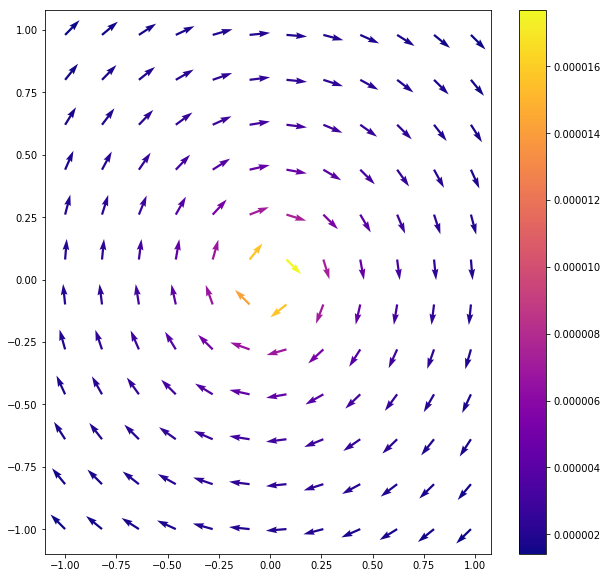

In [15]:
%run secret_plot_function.py
secret_plot_function(b_wire, [-1,1],[-1,1], 0.18)